In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [2]:
bmi_labels = ["Underweight", "Healthy weight", "Overweight", "Obese"]
cut_bins = [0, 18.5, 24.9, 29.9, 150]
df['bmi_label'] = pd.cut(df['bmi'], bins=cut_bins, labels=bmi_labels)
print(df)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

           bmi_label  
0         Overweight  
1              Obese  
2              Obese  
3     Healthy weight  
4         Overweight  
...              ... 

In [3]:
df2 = df.copy(deep=True)

# for example, different regions being of a higher or lower value is meaningless.  Only that they are distinct
# pd.get_dummies on the other hand creates a new column for each value and sets it to a binary of 1 and 0 depending
# if the value is present in that row
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()

df['bmi_label_enc'] = le1.fit_transform(df['bmi_label'])

df2 = pd.get_dummies(df, columns = ['region','bmi_label'], dtype=int)
df2['sex'] = le2.fit_transform(df2['sex'])
df2['smoker'] = le3.fit_transform(df2['smoker'])

print(df2.head())

   age  sex     bmi  children  smoker      charges  bmi_label_enc  \
0   19    0  27.900         0       1  16884.92400              2   
1   18    1  33.770         1       0   1725.55230              1   
2   28    1  33.000         3       0   4449.46200              1   
3   33    1  22.705         0       0  21984.47061              0   
4   32    1  28.880         0       0   3866.85520              2   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0                 0                 0                 0                 1   
1                 0                 0                 1                 0   
2                 0                 0                 1                 0   
3                 0                 1                 0                 0   
4                 0                 1                 0                 0   

   bmi_label_Underweight  bmi_label_Healthy weight  bmi_label_Overweight  \
0                      0                      

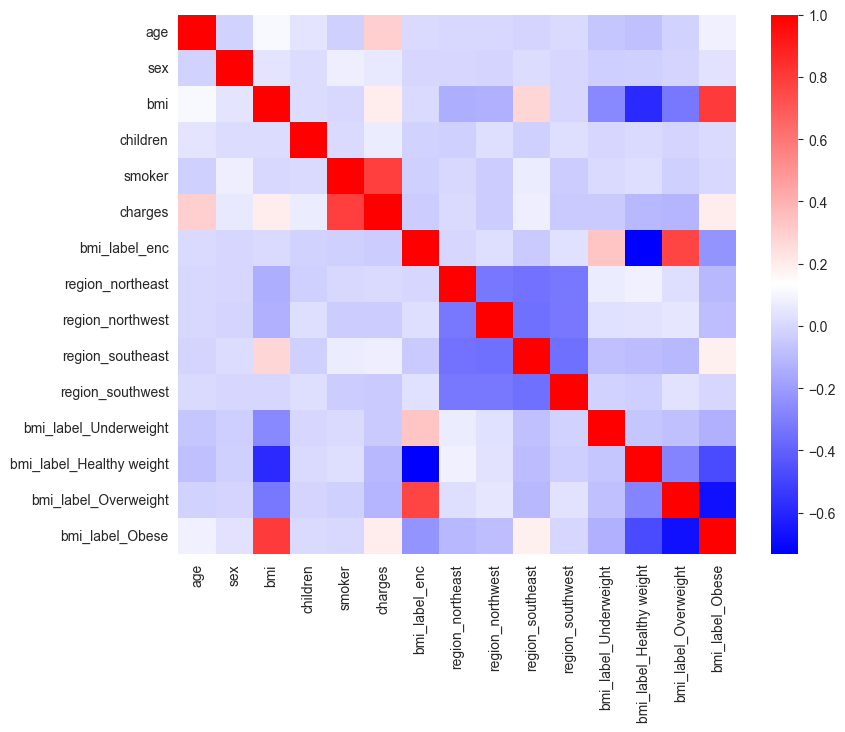

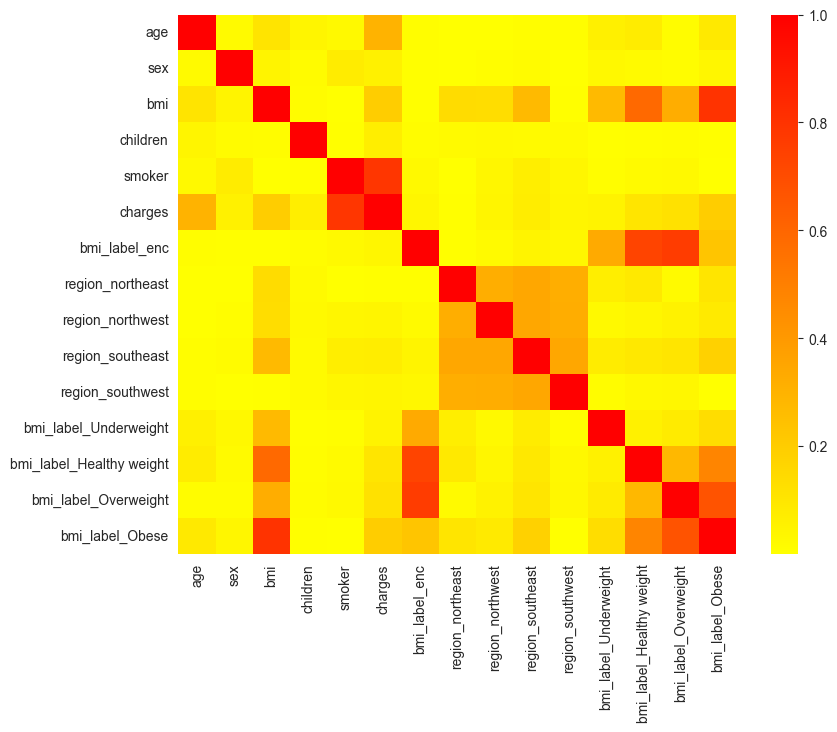

charges    1.000000
smoker     0.787251
Name: charges, dtype: float64


In [4]:
corr_matrix = df2.corr()
plt.figure(figsize = (9,7))
sns.heatmap(corr_matrix, cmap=plt.cm.bwr)
plt.show()
plt.figure(figsize = (9,7))
sns.heatmap(abs(corr_matrix), cmap=plt.cm.autumn_r)
plt.show()

corr_target = abs(corr_matrix['charges'])
rel_vars = corr_target[corr_target > .4]
rel_vars.sort_values(ascending=False, inplace=True)
print(rel_vars)

In [5]:
df_healthy = df2.loc[(df2['smoker'] == 0) & ((df2['bmi_label_Underweight'] == 1) | (df2['bmi_label_Healthy weight'] == 1))]
print(df_healthy)

      age  sex     bmi  children  smoker      charges  bmi_label_enc  \
3      33    1  22.705         0       0  21984.47061              0   
15     19    1  24.600         1       0   1837.23700              0   
17     23    1  23.845         0       0   2395.17155              0   
26     63    0  23.085         0       0  14451.83515              0   
28     23    1  17.385         1       0   2775.19215              3   
...   ...  ...     ...       ...     ...          ...            ...   
1292   21    1  23.210         0       0   1515.34490              0   
1295   20    1  22.000         1       0   1964.78000              0   
1302   25    0  20.800         1       0   3208.78700              0   
1316   19    0  20.600         0       0   1731.67700              0   
1328   23    0  24.225         2       0  22395.74424              0   

      region_northeast  region_northwest  region_southeast  region_southwest  \
3                    0                 1               

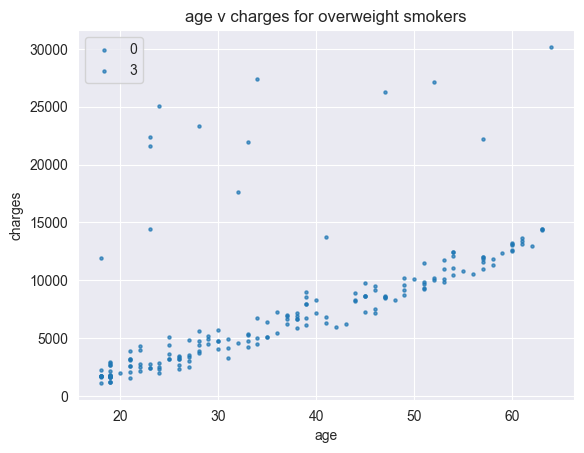

In [6]:
fig, ax = plt.subplots()
for bmi_label, healthy_temp in df_healthy.groupby('bmi_label_enc'):
    healthy_temp.plot('age', 'charges', kind='scatter', label=bmi_label, marker='.', alpha=.7, ax=ax)

plt.title('age v charges for overweight smokers')
plt.show()

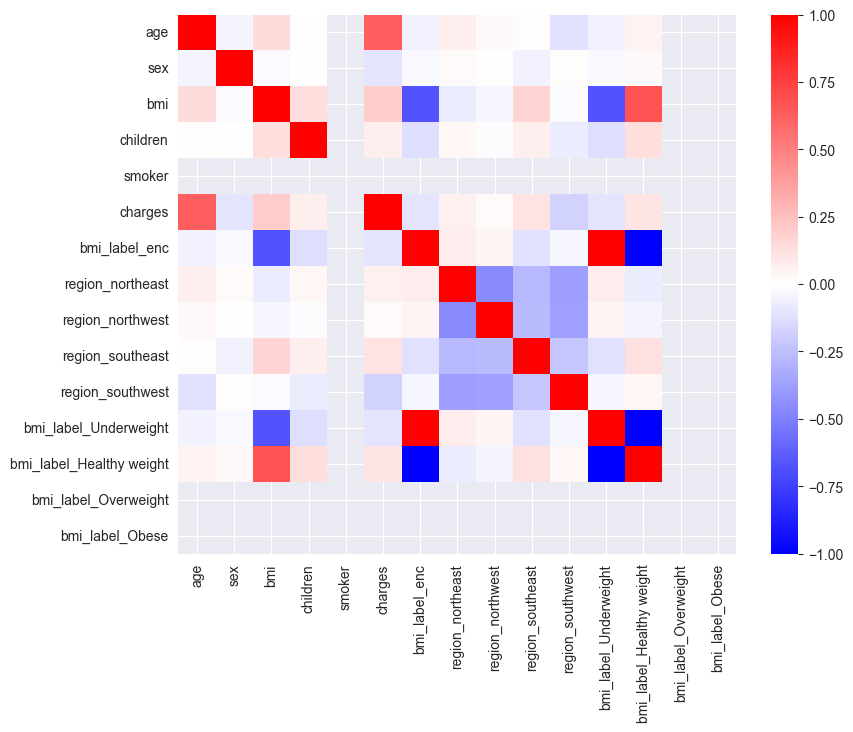

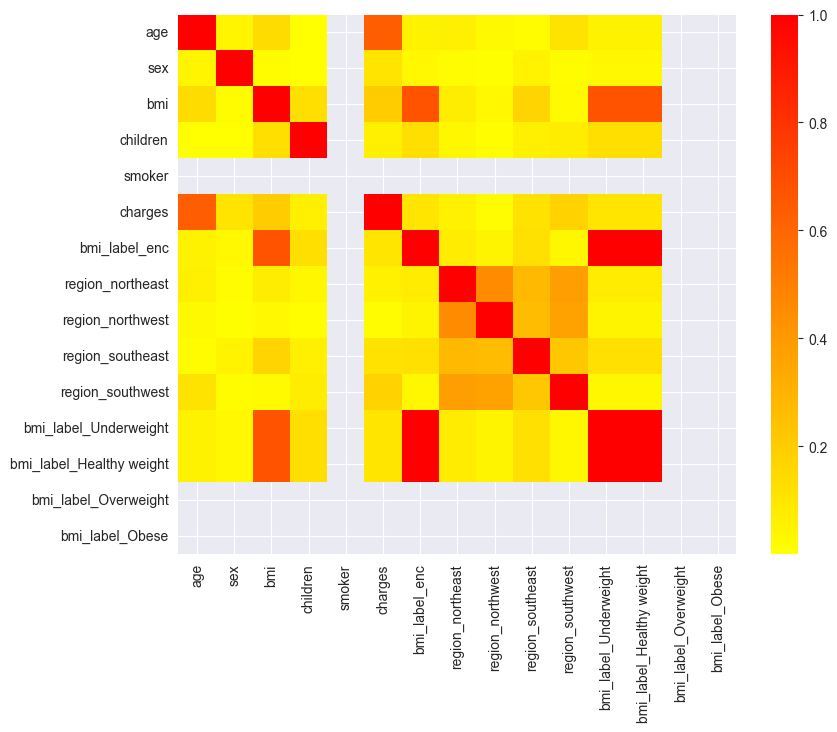

charges    1.000000
age        0.632382
Name: charges, dtype: float64


In [7]:
corr_matrix = df_healthy.corr()
plt.figure(figsize = (9,7))
sns.heatmap(corr_matrix, cmap=plt.cm.bwr)
plt.show()
plt.figure(figsize = (9,7))
sns.heatmap(abs(corr_matrix), cmap=plt.cm.autumn_r)
plt.show()

corr_target = abs(corr_matrix['charges'])
rel_vars = corr_target[corr_target > .4]
rel_vars.sort_values(ascending=False, inplace=True)
print(rel_vars)

In [8]:
x = df_healthy[['age']]
y = df_healthy['charges']
#create an age list that covers the range of min to max ages in the x axis incrementally increasing by .01 of an age
# *100 and /100 are used because range works at an integer level not a float level
age_list = [g/100 for g in range(df_healthy['age'].min()*100, (df_healthy['age'].max()*100)+1)]

df_age_list = pd.DataFrame({'age': age_list})
print(df_age_list)
df_age_list2 = df_age_list.copy(deep=True)

        age
0     18.00
1     18.01
2     18.02
3     18.03
4     18.04
...     ...
4596  63.96
4597  63.97
4598  63.98
4599  63.99
4600  64.00

[4601 rows x 1 columns]


In [10]:
dt_regr = DecisionTreeRegressor(max_depth=7, min_samples_leaf=20)
rf_regr = RandomForestRegressor(max_depth=2, min_samples_leaf=15, n_estimators=100)
lr_regr = LinearRegression()
vr_regr = VotingRegressor([('DT', dt_regr), ('RF', rf_regr), ('LR', lr_regr)])

dt_regr.fit(x, y)
rf_regr.fit(x, y)
lr_regr.fit(x, y)
vr_regr.fit(x, y)

df_age_list['dt'] = dt_regr.predict(df_age_list2)
df_age_list['rf'] = rf_regr.predict(df_age_list2)
df_age_list['lr'] = lr_regr.predict(df_age_list2)
df_age_list['vr'] = vr_regr.predict(df_age_list2)

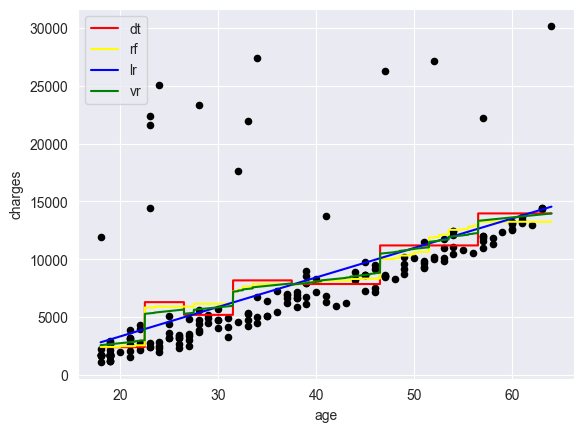

In [11]:
fig, ax = plt.subplots()

df_healthy.plot(kind='scatter', x='age', y='charges', ax=ax, color='black')
df_age_list.plot(kind='line', x='age', y='dt', ax=ax, color='red')
df_age_list.plot(kind='line', x='age', y='rf', ax=ax, color='yellow')
df_age_list.plot(kind='line', x='age', y='lr', ax=ax, color='blue')
df_age_list.plot(kind='line', x='age', y='vr', ax=ax, color='green')

ax.set_xlabel('age')
ax.set_ylabel('charges')

plt.show()


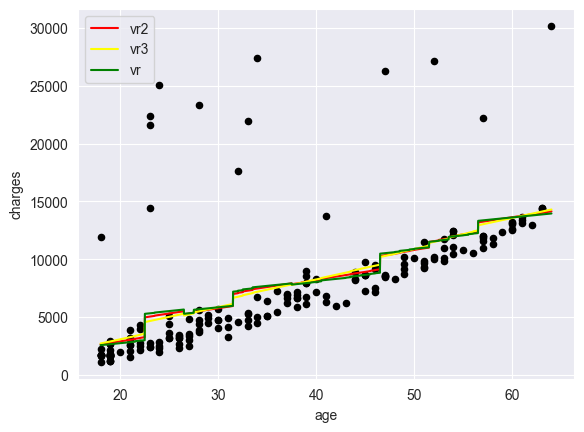

In [13]:
#voting regression models average the results of each prediction model fed into it as a parameter
# this helps to smooth out bias-variance trade off by averaging the results of models that tend toward bias (linear)
# with those that tend toward variance (decision tree) increasing the likelihood of arriving at the sweet range
# You can skew the weighting by adding more of the same prediction model.  For example you can weight the linear model
# by adding it to the parameters multiple times.
vr_regr2 = VotingRegressor([('DT', dt_regr), ('RF', rf_regr), ('LR', lr_regr), ('LR2', lr_regr)])
vr_regr3 = VotingRegressor([('DT', dt_regr), ('RF', rf_regr), ('LR', lr_regr), ('LR2', lr_regr), ('LR3', lr_regr), ('LR4', lr_regr), ('LR5', lr_regr)])

vr_regr2.fit(x, y)
vr_regr3.fit(x, y)

df_age_list['vr2'] = vr_regr2.predict(df_age_list2)
df_age_list['vr3'] = vr_regr3.predict(df_age_list2)

fig, ax = plt.subplots()

df_healthy.plot(kind='scatter', x='age', y='charges', ax=ax, color='black')
df_age_list.plot(kind='line', x='age', y='vr2', ax=ax, color='red')
df_age_list.plot(kind='line', x='age', y='vr3', ax=ax, color='yellow')
df_age_list.plot(kind='line', x='age', y='vr', ax=ax, color='green')

ax.set_xlabel('age')
ax.set_ylabel('charges')

plt.show()